## Bike Sharing Demand

In [1]:
## as we know we have 2 files for Bike Sharing Demand project
  # 1.Train 
  # 2.Test

##So on train data we will train our model and using test data we will predict the output 
## But for any preprocessing the data we will merge the train and test data 

In [2]:
## Import required packages/ library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
from datetime import datetime 
import warnings
warnings.filterwarnings("ignore")

#### Let's Load the data from train and test file 

In [3]:
df_bsd_train = pd.read_csv("train.csv")
df_bsd_test = pd.read_csv("test.csv")

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
## Lets check whether the data loaded are not from train and test file

In [6]:
# From Train File 
# here we can see the data loaded successfully
df_bsd_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# From Test File 
# here we can see the data loaded successfully
df_bsd_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


####  1.Check the info of the both the dataset's

In [8]:
df_bsd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
df_bsd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [10]:
## Check for Null and Nan values

In [11]:
df_bsd_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
df_bsd_test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [13]:
### here we can see for both the dataset Train and Test neither we have any missing values nor Nan values.

### Original Databack up

###### Let's first take the copy or backup of original data (Train and Test)
###### here we copy the data just incase in further process we need any thing from default  dataset then we can use it.

In [14]:
df_O_train = df_bsd_train.copy()
df_O_test = df_bsd_test.copy()

In [15]:
## Let's Convert the datatime feature data type from object to datetime datatype
## so that later we can extract the date and time seperately
## We will save the converted and save the values in same column i.e  "datetime"

In [16]:
df_bsd_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
df_bsd_train['datetime'] = pd.to_datetime(df_bsd_train["datetime"])

In [18]:
# Let's check the datatype of  "datetime" feature

In [19]:
df_bsd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


#### Extract Date and time from "datetime" feature

In [20]:
## Lets first extract the date and time and create new Feature 
   ## 1. date
   ## 2.time 
   ## 3.Year
   ## 4.Month

In [21]:
df_bsd_train["Year"] =  df_bsd_train["datetime"].dt.year
df_bsd_train["Month_In_Number"] = df_bsd_train["datetime"].dt.month
df_bsd_train["Date"] =  df_bsd_train["datetime"].dt.date
df_bsd_train["Day"] =  df_bsd_train["datetime"].dt.day_name()
df_bsd_train["Weeks"] =  df_bsd_train["datetime"].dt.dayofweek
df_bsd_train["TimeIn_24_Hrs"] =df_bsd_train["datetime"].dt.time

In [22]:
df_bsd_train["Month_Title"] =df_bsd_train["Month_In_Number"].apply(lambda x : calendar.month_name[x])

In [23]:
timein12hrs=[]
AM_time =[]
PM_time =[]
ampmdict= []
def convert_time_into_12hr(data):
    d = datetime.strptime(f"{data}", "%H:%M:%S")
    timeampm = d.strftime("%I:%M %p")
    time = d.strftime("%I:%M")
    ampm= d.strftime("%p")
    timein12hrs.append(timeampm)
    if ampm.lower() == "am":
        AM_time.append(time)
        PM_time.append(0)
    else:
        AM_time.append(0)
        PM_time.append(time)
        

In [24]:
for item in df_bsd_train["TimeIn_24_Hrs"]:
    convert_time_into_12hr(item)

In [25]:
df_bsd_train["TimeIn12Hrs"] =  timein12hrs
df_bsd_train["TimeInAM"] = AM_time
df_bsd_train["TimeInPM"] = PM_time

In [26]:
## As of now we extract every think we want from datetime feature incase in  further process any thing we have to extract from datetime (from original dataset) then we will definately do but now we can drop it from dataset

#### Drop datetime feature

In [27]:
df_bsd_train.drop(columns=['datetime'],inplace=True)

In [28]:
df_bsd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           10886 non-null  int64  
 1   holiday          10886 non-null  int64  
 2   workingday       10886 non-null  int64  
 3   weather          10886 non-null  int64  
 4   temp             10886 non-null  float64
 5   atemp            10886 non-null  float64
 6   humidity         10886 non-null  int64  
 7   windspeed        10886 non-null  float64
 8   casual           10886 non-null  int64  
 9   registered       10886 non-null  int64  
 10  count            10886 non-null  int64  
 11  Year             10886 non-null  int64  
 12  Month_In_Number  10886 non-null  int64  
 13  Date             10886 non-null  object 
 14  Day              10886 non-null  object 
 15  Weeks            10886 non-null  int64  
 16  TimeIn_24_Hrs    10886 non-null  object 
 17  Month_Title 

In [29]:
#ChangedtypeTodatetime = ['TimeIn_24_Hrs','TimeIn12Hrs','TimeInAM','TimeInPM']

In [30]:
#pd.to_datetime(df_bsd_train['TimeIn12Hrs'])

# Exploratory Data Analysis

### Univarient Analysis

### 1.Year

In [32]:
df_bsd_train["Year"].value_counts(normalize=True)

2012    0.501929
2011    0.498071
Name: Year, dtype: float64

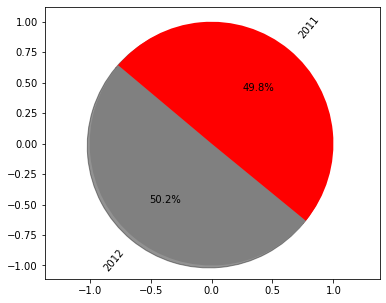

In [33]:
data_year = pd.DataFrame(df_bsd_train["Year"].value_counts(normalize=True).reset_index())
plt.figure(figsize=(6,5))
plt.subplot()
plt.pie(data=data_year,x="Year",autopct="%1.1f%%",labels="index",shadow=True,startangle=140,frame=True,colors=["gray","red"],rotatelabels=True)
plt.axis("equal")
plt.savefig("EDA_img\year.jpg")
plt.show()

### 2.Holiday


In [34]:
year_2011 =  df_bsd_train['Year'] == 2011

year_2012 =  df_bsd_train['Year'] == 2012

df_month = df_bsd_train['Month_In_Number'] ==1 

holiday_1 = df_bsd_train['holiday'] == 1

holiday_0 = df_bsd_train['holiday'] == 0

df_date_unique = df_bsd_train["Date"].unique()

In [35]:
df_bsd_train["TimeIn_24_Hrs"] = df_bsd_train['TimeIn_24_Hrs'].apply(str).str.replace(',', '')
df_bsd_train["Date"] = df_bsd_train["Date"].apply(str).str.replace(',', '')

In [36]:
len(df_bsd_train[year_2011 & holiday_1]['Date'].unique())
len(df_bsd_train[year_2012 & holiday_1]['Date'].unique())
len(df_bsd_train[year_2011 & holiday_0]['Date'].unique())
len(df_bsd_train[year_2011]['Date'].unique())
len(df_bsd_train[year_2012]['Date'].unique())
len(df_bsd_train[year_2012 & holiday_0]['Date'].unique())

221

In [37]:
holidayIn2011_2012 = { 
    "Year" : [2011,2012], 
    'Total_Working_DaysIn_Year' : [len(df_bsd_train[year_2011]['Date'].unique()),len(df_bsd_train[year_2012]['Date'].unique())],
    'Holidays_Count' : [len(df_bsd_train[year_2011 & holiday_1]['Date'].unique()), len(df_bsd_train[year_2012 & holiday_1]['Date'].unique())],
    'Not_Holidays' : [len(df_bsd_train[year_2011 & holiday_0]['Date'].unique()), len(df_bsd_train[year_2012 & holiday_0]['Date'].unique())] 
}

In [38]:
holidayIn2011_2012 = pd.DataFrame(holidayIn2011_2012)
holidayIn2011_2012

,Year,Total_Working_DaysIn_Year,Holidays_Count,Not_Holidays
0,2011,228,6,222
1,2012,228,7,221


<Figure size 3600x3600 with 0 Axes>

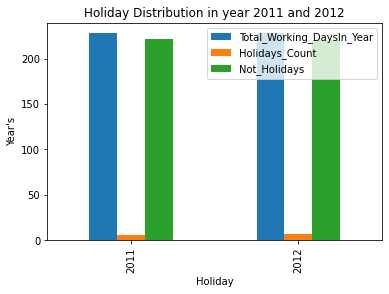

In [39]:
plt.figure(figsize=(50,50))
#plt.subplot(1,2,1)
holidayIn2011_2012.plot(x="Year", y =["Total_Working_DaysIn_Year",'Holidays_Count','Not_Holidays'],kind="bar")
plt.ylabel("Year's")
plt.xlabel("Holiday")
plt.title("Holiday Distribution in year 2011 and 2012")
plt.legend()
plt.savefig("EDA_img\Holiday2011And2012.png")
plt.show()

### 3.Working Days

In [40]:
df_bsd_train["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [41]:
workingdays_0 = df_bsd_train["workingday"] ==0
workingdays_1 = df_bsd_train["workingday"] ==1

### 4.Weather

##### weather - 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [43]:
df_bsd_train["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

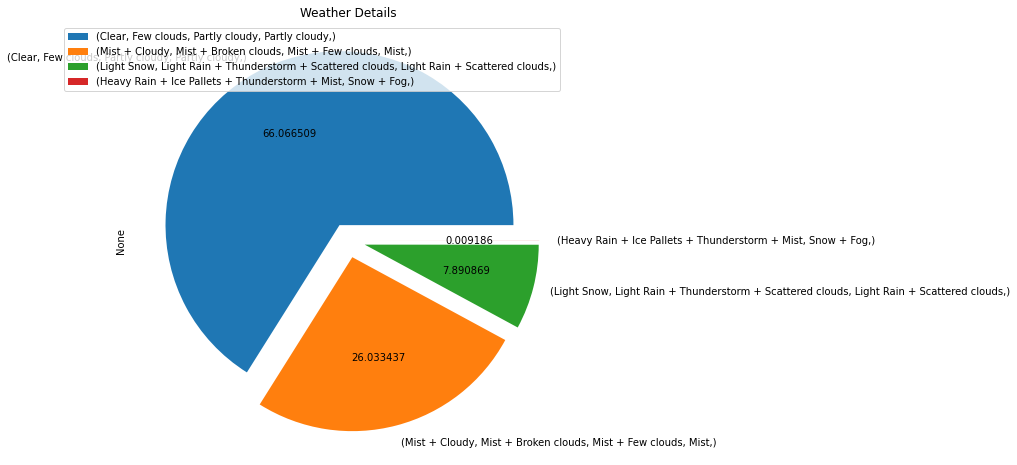

In [44]:
plt.figure(figsize=(8,8))
pd.DataFrame(df_bsd_train["weather"].map({1 : "Clear, Few clouds, Partly cloudy, Partly cloudy",
                             2 : "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                             3 : "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                             4 : "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"})).value_counts(normalize=True).plot(kind="pie",autopct="%2f",explode=[0.1,0.1,0.1,0.1])
plt.legend()
plt.title("Weather Details")
plt.savefig("EDA_img\WeatherInfo.png")

### 5.Temperature

###### temp - temperature in Celsius

In [45]:
max_temp_2011 = max(df_bsd_train[year_2011]['temp'])
min_temp_2011 = min(df_bsd_train[year_2011]['temp'])
most_repeated_temp_2011 = df_bsd_train[year_2011]['temp'].mode()[0]

##====================================================

max_temp_2012 = max(df_bsd_train[year_2012]['temp'])
min_temp_2012 = min(df_bsd_train[year_2012]['temp'])
most_repeated_temp_2012 = df_bsd_train[year_2012]['temp'].mode()[0]

<Figure size 720x576 with 0 Axes>

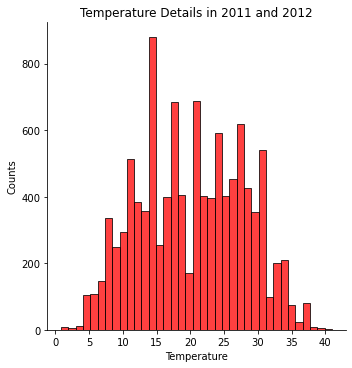

In [70]:
plt.figure(figsize=(10,8))
sns.displot(df_bsd_train['temp'],color='red')
plt.xlabel("Temperature")
plt.ylabel("Counts")
plt.title("Temperature Details in 2011 and 2012")
plt.savefig("temperatur.png")
plt.show()

In [46]:
df_bsd_train[df_bsd_train['temp'] == max_temp_2011]['Month_Title'].unique()
df_bsd_train[df_bsd_train['temp'] == max_temp_2012]['Month_Title'].unique()

array(['July'], dtype=object)

In [47]:
temperature_2011_2012 = {
    "Year" : df_bsd_train['Year'].unique(),
    "Max_Temp" : [max_temp_2011,max_temp_2012],
    "Min_Temp" : [min_temp_2011,min_temp_2012],
    "Most_Repeated_Temp" : [most_repeated_temp_2011,most_repeated_temp_2012]
}

In [48]:
df_temp_2011_2012 = pd.DataFrame(temperature_2011_2012)
df_temp_2011_2012

,Year,Max_Temp,Min_Temp,Most_Repeated_Temp
0,2011,38.54,2.46,18.86
1,2012,41.00,0.82,14.76


<Figure size 2880x2880 with 0 Axes>

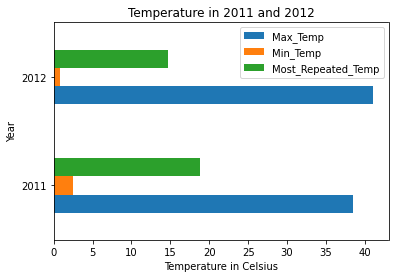

In [67]:
plt.figure(figsize=(40,40))
df_temp_2011_2012.plot(x="Year",y=["Max_Temp","Min_Temp","Most_Repeated_Temp"],kind="barh")
plt.title("Temperature in 2011 and 2012")
plt.ylabel("Year")
plt.xlabel("Temperature in Celsius")
plt.savefig("temperature2011_2012.png")
plt.show()

## 6 .temp

<AxesSubplot:xlabel='atemp', ylabel='Count'>

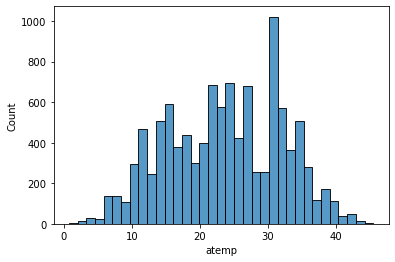

In [76]:
sns.histplot(df_bsd_train['atemp'])

# 7.Humidity

<AxesSubplot:xlabel='humidity', ylabel='Count'>

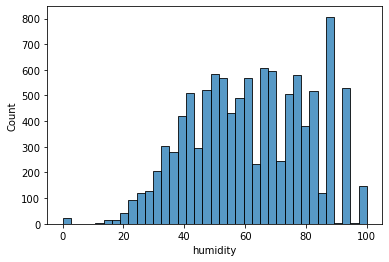

In [79]:
sns.histplot(df_bsd_train['humidity'])

## 8.windspeed

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

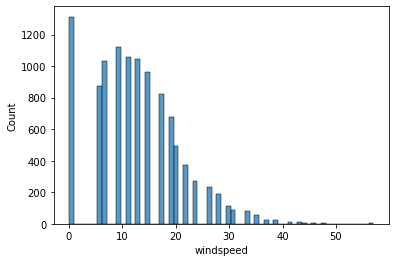

In [80]:
sns.histplot(df_bsd_train['windspeed'])

## 9.Season

In [50]:
df_bsd_train["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [82]:
#df_bsd_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" }).value_counts(normalize=True).plot.bar()

In [83]:
df_bsd_train["Season_Title"]= pd.DataFrame(df_bsd_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" }))

<Figure size 1440x1152 with 0 Axes>

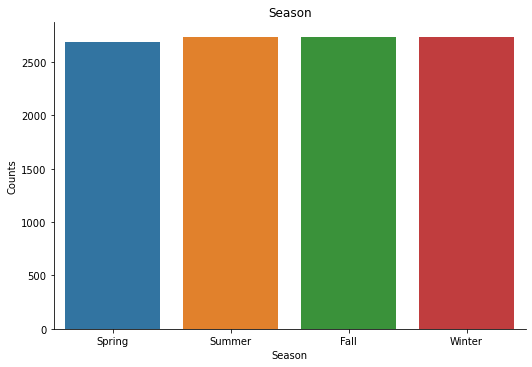

In [84]:
plt.figure(figsize=(20,16))
sns.factorplot(x ='Season_Title',data=df_bsd_train,kind="count",size=5,aspect=1.5)
plt.xlabel("Season")
plt.ylabel("Counts")
plt.title("Season")
plt.savefig("EDA_img\season.jpg")

In [85]:
#sns.barplot(data=df_bsd_train,x=df_bsd_train['season'],y=df_bsd_train['count'])

In [86]:
df_bsd_train.sample()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month_In_Number,Date,Day,Weeks,TimeIn_24_Hrs,Month_Title,TimeIn12Hrs,TimeInAM,TimeInPM,Season_Title
5690,1,0,1,3,14.76,17.425,93,8.9981,1,88,89,2012,1,2012-01-12,Thursday,3,06:00:00,January,06:00 AM,06:00,0,Spring


<AxesSubplot:>

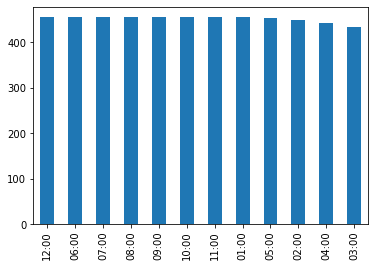

In [55]:
df_bsd_train['TimeInAM'][df_bsd_train['TimeInAM']!=0].value_counts().plot.bar()

In [56]:
df_bsd_train['TimeInAM'][df_bsd_train['TimeInAM']!=0].sort_values(ascending = False).value_counts()

12:00    455
11:00    455
10:00    455
09:00    455
08:00    455
07:00    455
06:00    455
01:00    454
05:00    452
02:00    448
04:00    442
03:00    433
Name: TimeInAM, dtype: int64

<AxesSubplot:>

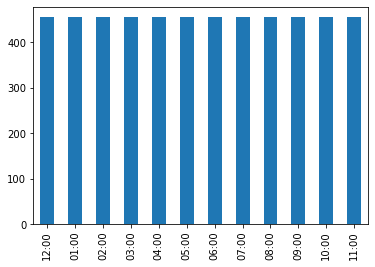

In [57]:
df_bsd_train['TimeInPM'][df_bsd_train['TimeInPM']!=0].value_counts().plot.bar()

In [58]:
df_O_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1
